# Plotting the flux space

There are different ways to visualize the space of feasible steady-state flux vectors. The two most popular plot types are production envelops and yield spaces. StrainDesign provides functions for both of these plot types, but additionally support plotting of arbitrary other projections or mappings of rate and yield terms. We again use the e_coli_core example for demonstration purposes.

In [1]:
import cobra
import straindesign as sd
model = cobra.io.load_model('e_coli_core')

Set parameter Username
Academic license - for non-commercial use only - expires 2022-07-13


## Production Envelopes

Production envelopes project the solution space of steady-state flux vectors onto the dimensions of growth rate and product synthesis rate. Such a plot can be generated by:

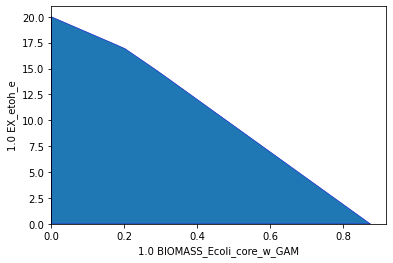

In [2]:
sd.plot_flux_space(model,('BIOMASS_Ecoli_core_w_GAM','EX_etoh_e'));

Again, arbitrary constraints can be applied to the flux space to plot subspaces. Here, we plot the flux space within a small range of oxygen uptakes ($1\text{-}2\,mmol_{0_2}g_{CDW}^{-1}h^{-1}$). This constraint reduces the maximum growth rate to a thrid, while maximum growth entails ethanol production.

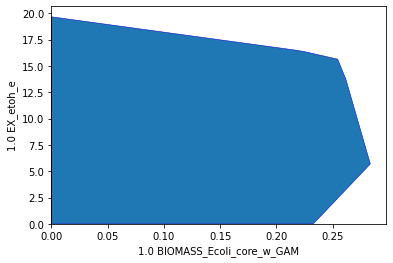

In [3]:
sd.plot_flux_space(model,('BIOMASS_Ecoli_core_w_GAM','EX_etoh_e'),constraints=['-EX_o2_e >= 1', '-EX_o2_e <= 2']);

It is also possible to use arbitrary linear expressions for the axis. Here, for instance, we plot the carbon recovery in the oxidized products formate, acetate and CO2 versus the reduced product ethanol. The coefficients for each product are matched with their number of carbon atoms. Glucose uptake is set to 1 (so the input equals 6 carbon atoms). The plot now shows that, stoichiometrically, at most of 4 out of 6 atoms can be directed to either side, ethanol or oxidized products. Yet, to balance redox equivalents, it is necessary, to then direct the remaining 2 carbon atoms towars the other side.

Read LP format model from file C:\Users\Philipp\AppData\Local\Temp\tmpqjpttq7m.lp
Reading time = 0.01 seconds
: 72 rows, 190 columns, 720 nonzeros


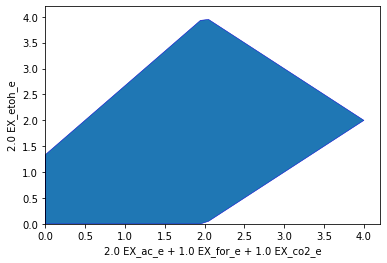

In [4]:
constraints=[
             'EX_h_e >= 0',
             'EX_co2_e >= 0',
             'EX_o2_e = 0'
             ]
model1 = model.copy()
model1.reactions.ATPM.lower_bound = 0
model1.reactions.EX_glc__D_e.lower_bound = -1
model1.reactions.EX_glc__D_e.upper_bound = -1
datapoints, triang, plot1 = sd.plot_flux_space(model1,('2 EX_ac_e + 1 EX_for_e + 1 EX_co2_e','2 EX_etoh_e'),constraints = constraints);

Notice that the top edge has a bump? We may use a finer sampling grid to even out such artifacts.

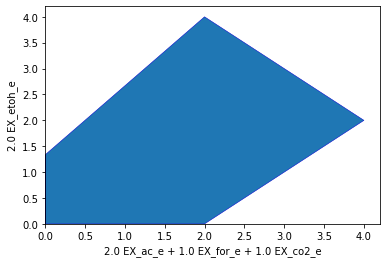

In [7]:
datapoints, triang, plot1 = sd.plot_flux_space(model1,('2 EX_ac_e + 1 EX_for_e + 1 EX_co2_e','2 EX_etoh_e'),constraints = constraints, points=55);

## Yield Spaces

## Mixed Plots